In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import argparse

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import BoundaryAttack, SimBA
from art.attacks.evasion import BasicIterativeMethod
from art.estimators.classification import PyTorchClassifier
from art.utils import load_mnist


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
from torchvision import transforms
import time
from tqdm.autonotebook import tqdm
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.nn.parameter import Parameter
import torchvision
import numpy as np
from SpykeTorch import snn
from SpykeTorch import visualization as visualization
from SpykeTorch import functional as sf
from SpykeTorch import utils
from torchvision import transforms
import struct
import glob

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

epsilons = [0, .05, .1, .15, .2, .25, .3]
pretrained_model = "data/lenet_mnist_model.pth"
use_cuda=True

# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
# MNIST Test dataset and dataloader declaration
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=1, shuffle=True)

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Initialize the network
model = Net().to(device)

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()


from art.attacks.evasion import FastGradientMethod,CarliniLInfMethod, CarliniL2Method, DeepFool, PixelAttack, ProjectedGradientDescentPyTorch,SpatialTransformation
from art.attacks.evasion import BoundaryAttack, SaliencyMapMethod
from art.attacks.evasion import BasicIterativeMethod
from art.estimators.classification import PyTorchClassifier
from art.utils import load_mnist

train_set = datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ]))
test_set= datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ]))

x_train = (train_set.data).unsqueeze(axis=1) 
y_train= train_set.targets
x_test= test_set.data.unsqueeze(axis=1)
y_test = test_set.targets

x_train = x_train.numpy().astype(np.float32) /255
y_train= y_train.numpy().astype(np.float32)
x_test = x_test.numpy().astype(np.float32) /255
y_test= y_test.numpy().astype(np.float32)

# Step 1: Load the MNIST dataset

(x_trainn, y_trainn), (x_testt, y_testt), min_pixel_value, max_pixel_value = load_mnist()
# Step 1a: Swap axes to PyTorch's NCHW format

x_trainn = np.swapaxes(x_trainn, 1, 3).astype(np.float32)
x_trainn = np.swapaxes(x_trainn, 2, 3)
x_testt = np.swapaxes(x_testt, 1, 3).astype(np.float32)
x_testt = np.swapaxes(x_testt, 2, 3)

# Step 2a: Define the loss function and the optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Create the ART classifier Lenet Model

classifier = PyTorchClassifier(
    model=model, 
    clip_values=(0, 1),
    loss=criterion,
    optimizer=optimizer,
    input_shape=(1, 28, 28),
    nb_classes=10,
)


classifier.fit(x_train, y_train, batch_size=64, nb_epochs=10)

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == y_test) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))



CUDA Available:  True
Accuracy on benign test examples: 97.87%


In [2]:
x_test.shape

(10000, 1, 28, 28)

In [16]:
##Do pixel attack in LeNet
import os.path
path= '/home/aashish/Downloads/First/SpykeTorch-master/AdversarialSNN/PIXEL_ATTACK/'
if (os.path.isdir(path)==False):
    os.mkdir(path)
    
# Step 6: Generate adversarial test examples
pixel_attack= PixelAttack(classifier=classifier,th=50,es=1,verbose=True)
x_test_adv_pixel = pixel_attack.generate(x=x_test)

filename= path+"pixel_"+str(50)+".npy"
with open(filename, 'wb') as f:
    np.save(f, x_test_adv_pixel)

differential_evolution step 1: f(x)= -984.791
differential_evolution step 1: f(x)= -957.172
differential_evolution step 1: f(x)= -1857.32
differential_evolution step 1: f(x)= -1898.94
differential_evolution step 1: f(x)= -1120.61
differential_evolution step 1: f(x)= -2150.44
differential_evolution step 1: f(x)= -807.127
differential_evolution step 1: f(x)= -1662.75
differential_evolution step 1: f(x)= -1501.99
differential_evolution step 1: f(x)= -1192.93
differential_evolution step 1: f(x)= -1125.62
differential_evolution step 1: f(x)= -1672.58
differential_evolution step 1: f(x)= -982.002
differential_evolution step 1: f(x)= -1449.61
differential_evolution step 1: f(x)= -3987.77
differential_evolution step 1: f(x)= -559.589
differential_evolution step 1: f(x)= -661.898
differential_evolution step 1: f(x)= -1442.57
differential_evolution step 1: f(x)= -1148.9
differential_evolution step 1: f(x)= -896.369
differential_evolution step 1: f(x)= -1476.84
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1779.09
differential_evolution step 1: f(x)= 0
differential_evolution step 2: f(x)= -32.7429


/home/aashish/anaconda3/envs/latestSNN/lib/python3.8/site-packages/art/attacks/evasion/pixel_threshold.py:1170: RuntimeWarning: divide by zero encountered in double_scalars
  convergence=self.tol / convergence,


differential_evolution step 1: f(x)= -1157.14
differential_evolution step 1: f(x)= -2375.22
differential_evolution step 1: f(x)= -745.625
differential_evolution step 1: f(x)= -1059.09
differential_evolution step 1: f(x)= -300.187
differential_evolution step 1: f(x)= -763.163
differential_evolution step 1: f(x)= -1001.3
differential_evolution step 1: f(x)= -1941.14
differential_evolution step 1: f(x)= -2196.7
differential_evolution step 1: f(x)= -2301.41
differential_evolution step 1: f(x)= -3004.96
differential_evolution step 1: f(x)= -607.241
differential_evolution step 1: f(x)= -1190.09
differential_evolution step 1: f(x)= -2251.63
differential_evolution step 1: f(x)= -2450.78
differential_evolution step 1: f(x)= -1882.61
differential_evolution step 1: f(x)= -502.58
differential_evolution step 1: f(x)= -626.905
differential_evolution step 1: f(x)= -1096.72
differential_evolution step 1: f(x)= -1095.13
differential_evolution step 1: f(x)= -1352.64
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -1567.52
differential_evolution step 1: f(x)= -529.377
differential_evolution step 1: f(x)= -1134.08
differential_evolution step 1: f(x)= -1485.05
differential_evolution step 1: f(x)= -1962.48
differential_evolution step 1: f(x)= -966.673
differential_evolution step 1: f(x)= -1867.16
differential_evolution step 1: f(x)= -709.501
differential_evolution step 1: f(x)= -432.704
differential_evolution step 1: f(x)= -866.096
differential_evolution step 1: f(x)= -1235.92
differential_evolution step 1: f(x)= -76.4181
differential_evolution step 1: f(x)= -729.616
differential_evolution step 1: f(x)= -854.694
differential_evolution step 1: f(x)= -471.78
differential_evolution step 1: f(x)= -2263.63
differential_evolution step 1: f(x)= -3356.43
differential_evolution step 1: f(x)= -1482.52
differential_evolution step 1: f(x)= -651.782
differential_evolution step 1: f(x)= -1831.42
differential_evolution step 1: f(x)= -1113.98
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1661.05
differential_evolution step 1: f(x)= -480.617
differential_evolution step 1: f(x)= -833.741
differential_evolution step 1: f(x)= -590.13
differential_evolution step 1: f(x)= -869.218
differential_evolution step 1: f(x)= -2255.36
differential_evolution step 1: f(x)= -577.285
differential_evolution step 1: f(x)= -750.113
differential_evolution step 1: f(x)= -1007.87
differential_evolution step 1: f(x)= -482.146
differential_evolution step 1: f(x)= -536.203
differential_evolution step 1: f(x)= -734.5
differential_evolution step 1: f(x)= -3170.46
differential_evolution step 1: f(x)= -889.852
differential_evolution step 1: f(x)= -1376.41
differential_evolution step 1: f(x)= -356.917
differential_evolution step 1: f(x)= -1617.81
differential_evolution step 1: f(x)= -714.133
differential_evolution step 1: f(x)= -332.378
differential_evolution step 1: f(x)= -696.027
differential_evolution step 1: f(x)= -750.01
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -3429.72
differential_evolution step 1: f(x)= -1116.34
differential_evolution step 1: f(x)= -1384.45
differential_evolution step 1: f(x)= -1852.16
differential_evolution step 1: f(x)= -1617.98
differential_evolution step 1: f(x)= -2376.22
differential_evolution step 1: f(x)= -2055.98
differential_evolution step 1: f(x)= -675.897
differential_evolution step 1: f(x)= -448.378
differential_evolution step 1: f(x)= -1612.69
differential_evolution step 1: f(x)= -2139.1
differential_evolution step 1: f(x)= -415.521
differential_evolution step 1: f(x)= -1026.94
differential_evolution step 1: f(x)= -931.256
differential_evolution step 1: f(x)= -833.636
differential_evolution step 1: f(x)= -3409.12
differential_evolution step 1: f(x)= -2493.62
differential_evolution step 1: f(x)= -1155.41
differential_evolution step 1: f(x)= -1132.3
differential_evolution step 1: f(x)= -1584.02
differential_evolution step 1: f(x)= -689.515
differential_evolution step 1: f(x)=

differential_evolution step 29: f(x)= 0
differential_evolution step 30: f(x)= 0
differential_evolution step 31: f(x)= 0
differential_evolution step 32: f(x)= 0
differential_evolution step 33: f(x)= 0
differential_evolution step 34: f(x)= 0
differential_evolution step 35: f(x)= 0
differential_evolution step 36: f(x)= 0
differential_evolution step 37: f(x)= 0
differential_evolution step 38: f(x)= 0
differential_evolution step 39: f(x)= 0
differential_evolution step 40: f(x)= 0
differential_evolution step 41: f(x)= 0
differential_evolution step 42: f(x)= 0
differential_evolution step 43: f(x)= 0
differential_evolution step 44: f(x)= 0
differential_evolution step 45: f(x)= 0
differential_evolution step 46: f(x)= 0
differential_evolution step 47: f(x)= 0
differential_evolution step 48: f(x)= 0
differential_evolution step 49: f(x)= 0
differential_evolution step 50: f(x)= 0
differential_evolution step 51: f(x)= 0
differential_evolution step 52: f(x)= 0
differential_evolution step 53: f(x)= 0


differential_evolution step 1: f(x)= -710.45
differential_evolution step 1: f(x)= -663.521
differential_evolution step 1: f(x)= -802.635
differential_evolution step 1: f(x)= -1896.15
differential_evolution step 1: f(x)= -1294.92
differential_evolution step 1: f(x)= -632.669
differential_evolution step 1: f(x)= -1934.79
differential_evolution step 1: f(x)= -1034.58
differential_evolution step 1: f(x)= -939.144
differential_evolution step 1: f(x)= -1432.21
differential_evolution step 1: f(x)= -688.154
differential_evolution step 1: f(x)= -97.3512
differential_evolution step 1: f(x)= -1639.35
differential_evolution step 1: f(x)= -1787.59
differential_evolution step 1: f(x)= -1381
differential_evolution step 1: f(x)= -1016.99
differential_evolution step 1: f(x)= -882.797
differential_evolution step 1: f(x)= -644.687
differential_evolution step 1: f(x)= -522.18
differential_evolution step 1: f(x)= -2068.59
differential_evolution step 1: f(x)= -1596.24
differential_evolution step 1: f(x)= -1

differential_evolution step 1: f(x)= -1123.15
differential_evolution step 1: f(x)= -564.735
differential_evolution step 1: f(x)= -614.699
differential_evolution step 1: f(x)= -1320.26
differential_evolution step 1: f(x)= -687.568
differential_evolution step 1: f(x)= -1013.81
differential_evolution step 1: f(x)= -785.83
differential_evolution step 1: f(x)= -914.082
differential_evolution step 1: f(x)= -998.282
differential_evolution step 1: f(x)= -634.057
differential_evolution step 1: f(x)= -1929.11
differential_evolution step 1: f(x)= -1273.14
differential_evolution step 1: f(x)= -1681.4
differential_evolution step 1: f(x)= -469.566
differential_evolution step 1: f(x)= -743.404
differential_evolution step 1: f(x)= -558.772
differential_evolution step 1: f(x)= -738.9
differential_evolution step 1: f(x)= -439.573
differential_evolution step 1: f(x)= -2102.97
differential_evolution step 1: f(x)= -1971.46
differential_evolution step 1: f(x)= -718.967
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -542.505
differential_evolution step 1: f(x)= -352.448
differential_evolution step 1: f(x)= -687.545
differential_evolution step 1: f(x)= -1569
differential_evolution step 1: f(x)= -3032.88
differential_evolution step 1: f(x)= -735.778
differential_evolution step 1: f(x)= -1316.87
differential_evolution step 1: f(x)= -627.784
differential_evolution step 1: f(x)= -1079.34
differential_evolution step 1: f(x)= -528.186
differential_evolution step 1: f(x)= -1862.11
differential_evolution step 1: f(x)= -931.592
differential_evolution step 1: f(x)= -857.293
differential_evolution step 1: f(x)= -941.278
differential_evolution step 1: f(x)= -1144.42
differential_evolution step 1: f(x)= -532.086
differential_evolution step 1: f(x)= -1935.92
differential_evolution step 1: f(x)= -2300.73
differential_evolution step 1: f(x)= -443.818
differential_evolution step 1: f(x)= -747.484
differential_evolution step 1: f(x)= -1216.81
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -655.076
differential_evolution step 1: f(x)= -657.335
differential_evolution step 1: f(x)= -987.52
differential_evolution step 1: f(x)= -622.202
differential_evolution step 1: f(x)= -804.918
differential_evolution step 1: f(x)= -1135.66
differential_evolution step 1: f(x)= -881.628
differential_evolution step 1: f(x)= -712.186
differential_evolution step 1: f(x)= -2041.8
differential_evolution step 1: f(x)= -484.39
differential_evolution step 1: f(x)= -1062.27
differential_evolution step 1: f(x)= -161.587
differential_evolution step 1: f(x)= -821.821
differential_evolution step 1: f(x)= -930.325
differential_evolution step 1: f(x)= -611.198
differential_evolution step 1: f(x)= -723.645
differential_evolution step 1: f(x)= -1228.7
differential_evolution step 1: f(x)= -1148.82
differential_evolution step 1: f(x)= -2007.16
differential_evolution step 1: f(x)= -666.627
differential_evolution step 1: f(x)= -3067.95
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -608.609
differential_evolution step 1: f(x)= -1271.43
differential_evolution step 1: f(x)= -306.625
differential_evolution step 1: f(x)= -823.605
differential_evolution step 1: f(x)= -885.265
differential_evolution step 1: f(x)= -2580.12
differential_evolution step 1: f(x)= -1915.06
differential_evolution step 1: f(x)= -562.547
differential_evolution step 1: f(x)= -973.662
differential_evolution step 1: f(x)= -727.119
differential_evolution step 1: f(x)= -621.917
differential_evolution step 1: f(x)= -1082.34
differential_evolution step 1: f(x)= -1258.46
differential_evolution step 1: f(x)= -1679.92
differential_evolution step 1: f(x)= -736.436
differential_evolution step 1: f(x)= -935.422
differential_evolution step 1: f(x)= -720.812
differential_evolution step 1: f(x)= -2965.58
differential_evolution step 1: f(x)= -681.933
differential_evolution step 1: f(x)= -837.441
differential_evolution step 1: f(x)= -4318.55
differential_evolution step 1: f(x

differential_evolution step 1: f(x)= -4006.63
differential_evolution step 1: f(x)= -1208.13
differential_evolution step 1: f(x)= -1464.49
differential_evolution step 1: f(x)= -1951.1
differential_evolution step 1: f(x)= -298.15
differential_evolution step 1: f(x)= -1269.5
differential_evolution step 1: f(x)= -645.567
differential_evolution step 1: f(x)= -1043.73
differential_evolution step 1: f(x)= -984.187
differential_evolution step 1: f(x)= -2251.62
differential_evolution step 1: f(x)= -758.528
differential_evolution step 1: f(x)= -2237.65
differential_evolution step 1: f(x)= -1338.36
differential_evolution step 1: f(x)= -1624.56
differential_evolution step 1: f(x)= -821.239
differential_evolution step 1: f(x)= -1182.01
differential_evolution step 1: f(x)= -2226.18
differential_evolution step 1: f(x)= -2161.42
differential_evolution step 1: f(x)= -1972.18
differential_evolution step 1: f(x)= -1861.44
differential_evolution step 1: f(x)= -709.402
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -1511.36
differential_evolution step 1: f(x)= -1323.11
differential_evolution step 1: f(x)= -410.624
differential_evolution step 1: f(x)= -235.455
differential_evolution step 1: f(x)= -1318.95
differential_evolution step 1: f(x)= -796.364
differential_evolution step 1: f(x)= -984.669
differential_evolution step 1: f(x)= -646.381
differential_evolution step 1: f(x)= -444.479
differential_evolution step 1: f(x)= -998.476
differential_evolution step 1: f(x)= -2706.13
differential_evolution step 1: f(x)= -539.463
differential_evolution step 1: f(x)= -1351.75
differential_evolution step 1: f(x)= -2103.82
differential_evolution step 1: f(x)= -1751.82
differential_evolution step 1: f(x)= -1085.6
differential_evolution step 1: f(x)= -1197.48
differential_evolution step 1: f(x)= -739.406
differential_evolution step 1: f(x)= -151.409
differential_evolution step 1: f(x)= -3141.66
differential_evolution step 1: f(x)= -1798.45
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1703.98
differential_evolution step 1: f(x)= -514.038
differential_evolution step 1: f(x)= -533.944
differential_evolution step 1: f(x)= -1026.92
differential_evolution step 1: f(x)= -982.855
differential_evolution step 1: f(x)= -1146.4
differential_evolution step 1: f(x)= -812.504
differential_evolution step 1: f(x)= -2187.47
differential_evolution step 1: f(x)= -909.221
differential_evolution step 1: f(x)= -787.553
differential_evolution step 1: f(x)= -1145.1
differential_evolution step 1: f(x)= -611.865
differential_evolution step 1: f(x)= -1486.87
differential_evolution step 1: f(x)= -678.475
differential_evolution step 1: f(x)= -1727.47
differential_evolution step 1: f(x)= -858.497
differential_evolution step 1: f(x)= -2450.44
differential_evolution step 1: f(x)= -494.966
differential_evolution step 1: f(x)= -2758.43
differential_evolution step 1: f(x)= -807.119
differential_evolution step 1: f(x)= -1100.01
differential_evolution step 1: f(x)=

differential_evolution step 1: f(x)= -174.22
differential_evolution step 1: f(x)= -951.408
differential_evolution step 1: f(x)= -1526.67
differential_evolution step 1: f(x)= -1089.92
differential_evolution step 1: f(x)= -810.134
differential_evolution step 1: f(x)= -3938.08
differential_evolution step 1: f(x)= -661.28
differential_evolution step 1: f(x)= -704.006
differential_evolution step 1: f(x)= -1613.46
differential_evolution step 1: f(x)= -1380.43
differential_evolution step 1: f(x)= -1970.28
differential_evolution step 1: f(x)= -811.139
differential_evolution step 1: f(x)= -1112.37
differential_evolution step 1: f(x)= -1407.8
differential_evolution step 1: f(x)= -1061.94
differential_evolution step 1: f(x)= -1623.71
differential_evolution step 1: f(x)= -1608.38
differential_evolution step 1: f(x)= -1481.52
differential_evolution step 1: f(x)= -970.457
differential_evolution step 1: f(x)= -766.81
differential_evolution step 1: f(x)= -1997.98
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -909.054
differential_evolution step 1: f(x)= -1097.16
differential_evolution step 1: f(x)= -758.751
differential_evolution step 1: f(x)= -1390.96
differential_evolution step 1: f(x)= -445.996
differential_evolution step 1: f(x)= -602.916
differential_evolution step 1: f(x)= -488.004
differential_evolution step 1: f(x)= -1078.56
differential_evolution step 1: f(x)= -2124.32
differential_evolution step 1: f(x)= -1673.93
differential_evolution step 1: f(x)= -1785.72
differential_evolution step 1: f(x)= -684.884
differential_evolution step 1: f(x)= -1150.05
differential_evolution step 1: f(x)= -1063.78
differential_evolution step 1: f(x)= -810.76
differential_evolution step 1: f(x)= -997.564
differential_evolution step 1: f(x)= -492.483
differential_evolution step 1: f(x)= -1705.73
differential_evolution step 1: f(x)= -810.468
differential_evolution step 1: f(x)= -789.371
differential_evolution step 1: f(x)= -1872.15
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1359.32
differential_evolution step 1: f(x)= -542.108
differential_evolution step 1: f(x)= -581.496
differential_evolution step 1: f(x)= -812.804
differential_evolution step 1: f(x)= -1328.28
differential_evolution step 1: f(x)= -2617.46
differential_evolution step 1: f(x)= -1796.31
differential_evolution step 1: f(x)= -639.302
differential_evolution step 1: f(x)= -2238.59
differential_evolution step 1: f(x)= -1548.75
differential_evolution step 1: f(x)= -783.414
differential_evolution step 1: f(x)= -1569.22
differential_evolution step 1: f(x)= -1721.34
differential_evolution step 1: f(x)= -283.099
differential_evolution step 1: f(x)= -1016.28
differential_evolution step 1: f(x)= -677.055
differential_evolution step 1: f(x)= -523.285
differential_evolution step 1: f(x)= -1092.89
differential_evolution step 1: f(x)= -1220.5
differential_evolution step 1: f(x)= -730.778
differential_evolution step 1: f(x)= -1523.18
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -650.087
differential_evolution step 1: f(x)= -1099.89
differential_evolution step 1: f(x)= -1492.46
differential_evolution step 1: f(x)= -955.193
differential_evolution step 1: f(x)= -607.418
differential_evolution step 1: f(x)= -987.841
differential_evolution step 1: f(x)= -1451.88
differential_evolution step 1: f(x)= -5.51137
differential_evolution step 1: f(x)= -5351.93
differential_evolution step 1: f(x)= -1444.96
differential_evolution step 1: f(x)= -1057.96
differential_evolution step 1: f(x)= -1014.1
differential_evolution step 1: f(x)= -1209.8
differential_evolution step 1: f(x)= -830.69
differential_evolution step 1: f(x)= -1287.72
differential_evolution step 1: f(x)= -741.519
differential_evolution step 1: f(x)= -330.411
differential_evolution step 1: f(x)= -1274.4
differential_evolution step 1: f(x)= -1185.45
differential_evolution step 1: f(x)= -755.885
differential_evolution step 1: f(x)= -902.912
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -1326.77
differential_evolution step 1: f(x)= -779.42
differential_evolution step 1: f(x)= -3234.48
differential_evolution step 1: f(x)= -690.287
differential_evolution step 1: f(x)= -1023.15
differential_evolution step 1: f(x)= -952.876
differential_evolution step 1: f(x)= -211.64
differential_evolution step 1: f(x)= -567.77
differential_evolution step 1: f(x)= -1038.23
differential_evolution step 1: f(x)= -926.309
differential_evolution step 1: f(x)= -824.954
differential_evolution step 1: f(x)= -649.727
differential_evolution step 1: f(x)= -819.719
differential_evolution step 1: f(x)= -617.586
differential_evolution step 1: f(x)= -1341.95
differential_evolution step 1: f(x)= -965.14
differential_evolution step 1: f(x)= -1002.65
differential_evolution step 1: f(x)= -1074.98
differential_evolution step 1: f(x)= -1203.11
differential_evolution step 1: f(x)= -1810.06
differential_evolution step 1: f(x)= -926.548
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -625.325
differential_evolution step 1: f(x)= -1865.31
differential_evolution step 1: f(x)= -686.724
differential_evolution step 1: f(x)= -995.746
differential_evolution step 1: f(x)= -1406.62
differential_evolution step 1: f(x)= -1933.16
differential_evolution step 1: f(x)= -1797.68
differential_evolution step 1: f(x)= -2091.34
differential_evolution step 1: f(x)= -2816.38
differential_evolution step 1: f(x)= -530.252
differential_evolution step 1: f(x)= -148.641
differential_evolution step 1: f(x)= -545.038
differential_evolution step 1: f(x)= -3109.26
differential_evolution step 1: f(x)= -913.32
differential_evolution step 1: f(x)= -1127.5
differential_evolution step 1: f(x)= -690.786
differential_evolution step 1: f(x)= -1053.7
differential_evolution step 1: f(x)= -1718.49
differential_evolution step 1: f(x)= -1336.66
differential_evolution step 1: f(x)= -2305.03
differential_evolution step 1: f(x)= -1508.04
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -1402.44
differential_evolution step 1: f(x)= -706.398
differential_evolution step 1: f(x)= -909.625
differential_evolution step 1: f(x)= -710.926
differential_evolution step 1: f(x)= -929.661
differential_evolution step 1: f(x)= -2084.64
differential_evolution step 1: f(x)= -1411.56
differential_evolution step 1: f(x)= -969.755
differential_evolution step 1: f(x)= -358.651
differential_evolution step 1: f(x)= -934.806
differential_evolution step 1: f(x)= -1921.88
differential_evolution step 1: f(x)= -2197.49
differential_evolution step 1: f(x)= -1733.94
differential_evolution step 1: f(x)= -1687.57
differential_evolution step 1: f(x)= -1597.18
differential_evolution step 1: f(x)= -1055.39
differential_evolution step 1: f(x)= -947.619
differential_evolution step 1: f(x)= -1644.79
differential_evolution step 1: f(x)= -1478.06
differential_evolution step 1: f(x)= -786.394
differential_evolution step 1: f(x)= -1223.01
differential_evolution step 1: f(x

differential_evolution step 1: f(x)= -532.647
differential_evolution step 1: f(x)= -76.4822
differential_evolution step 1: f(x)= -583.367
differential_evolution step 1: f(x)= -1720.88
differential_evolution step 1: f(x)= -864.887
differential_evolution step 1: f(x)= -762.289
differential_evolution step 1: f(x)= -906.039
differential_evolution step 1: f(x)= -663.056
differential_evolution step 1: f(x)= -1042.96
differential_evolution step 1: f(x)= -1661.61
differential_evolution step 1: f(x)= -2308.43
differential_evolution step 1: f(x)= -1871.67
differential_evolution step 1: f(x)= -915.958
differential_evolution step 1: f(x)= -1522.23
differential_evolution step 1: f(x)= -1441.03
differential_evolution step 1: f(x)= -1135.56
differential_evolution step 1: f(x)= -947.977
differential_evolution step 1: f(x)= -920.008
differential_evolution step 1: f(x)= -2218.87
differential_evolution step 1: f(x)= -1571.63
differential_evolution step 1: f(x)= -948.467
differential_evolution step 1: f(x

differential_evolution step 1: f(x)= -653.227
differential_evolution step 1: f(x)= -1394.75
differential_evolution step 1: f(x)= -1012.04
differential_evolution step 1: f(x)= -1032.2
differential_evolution step 1: f(x)= -1279.72
differential_evolution step 1: f(x)= -1133.71
differential_evolution step 1: f(x)= -307.15
differential_evolution step 1: f(x)= -1442.64
differential_evolution step 1: f(x)= -630.006
differential_evolution step 1: f(x)= -1229.99
differential_evolution step 1: f(x)= -2869.22
differential_evolution step 1: f(x)= -2284.81
differential_evolution step 1: f(x)= -2756.61
differential_evolution step 1: f(x)= -1419.29
differential_evolution step 1: f(x)= -1293.52
differential_evolution step 1: f(x)= -1028.51
differential_evolution step 1: f(x)= -869.28
differential_evolution step 1: f(x)= -2610.71
differential_evolution step 1: f(x)= -653.322
differential_evolution step 1: f(x)= -2197.51
differential_evolution step 1: f(x)= -1355.94
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -1393.34
differential_evolution step 1: f(x)= -1986.03
differential_evolution step 1: f(x)= -930.893
differential_evolution step 1: f(x)= -2648.42
differential_evolution step 1: f(x)= -1285.01
differential_evolution step 1: f(x)= -77.1766
differential_evolution step 1: f(x)= -1005.27
differential_evolution step 1: f(x)= -676.538
differential_evolution step 1: f(x)= -1399.04
differential_evolution step 1: f(x)= -1067.71
differential_evolution step 1: f(x)= -474.701
differential_evolution step 1: f(x)= -797.474
differential_evolution step 1: f(x)= -403.211
differential_evolution step 1: f(x)= -975.09
differential_evolution step 1: f(x)= -2037.95
differential_evolution step 1: f(x)= -937.563
differential_evolution step 1: f(x)= -534.893
differential_evolution step 1: f(x)= -822.219
differential_evolution step 1: f(x)= -254.808
differential_evolution step 1: f(x)= -1355.73
differential_evolution step 1: f(x)= -1657.15
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1070.64
differential_evolution step 1: f(x)= -841.962
differential_evolution step 1: f(x)= -473.373
differential_evolution step 1: f(x)= -1022.42
differential_evolution step 1: f(x)= -931.016
differential_evolution step 1: f(x)= -673.576
differential_evolution step 1: f(x)= -1249.15
differential_evolution step 1: f(x)= -2082.48
differential_evolution step 1: f(x)= -1562.76
differential_evolution step 1: f(x)= -902.625
differential_evolution step 1: f(x)= -787.998
differential_evolution step 1: f(x)= -702.109
differential_evolution step 1: f(x)= -594.539
differential_evolution step 1: f(x)= -709.298
differential_evolution step 1: f(x)= -1717.3
differential_evolution step 1: f(x)= -1371.79
differential_evolution step 1: f(x)= -961.737
differential_evolution step 1: f(x)= -802.709
differential_evolution step 1: f(x)= -461.516
differential_evolution step 1: f(x)= -524.831
differential_evolution step 1: f(x)= -699.551
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1062.89
differential_evolution step 1: f(x)= -315.052
differential_evolution step 1: f(x)= -688.569
differential_evolution step 1: f(x)= -1446.24
differential_evolution step 1: f(x)= -727.234
differential_evolution step 1: f(x)= -1596.82
differential_evolution step 1: f(x)= -1152.49
differential_evolution step 1: f(x)= -3827.82
differential_evolution step 1: f(x)= -738.794
differential_evolution step 1: f(x)= -1276.64
differential_evolution step 1: f(x)= -1356.72
differential_evolution step 1: f(x)= -1045.26
differential_evolution step 1: f(x)= -379.54
differential_evolution step 1: f(x)= -1503.56
differential_evolution step 1: f(x)= -1532.87
differential_evolution step 1: f(x)= -689.311
differential_evolution step 1: f(x)= -1359.33
differential_evolution step 1: f(x)= -825.427
differential_evolution step 1: f(x)= -1103.85
differential_evolution step 1: f(x)= -767.034
differential_evolution step 1: f(x)= -1234.16
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -2827.41
differential_evolution step 1: f(x)= -585.232
differential_evolution step 1: f(x)= -1254.1
differential_evolution step 1: f(x)= -584.047
differential_evolution step 1: f(x)= -721.609
differential_evolution step 1: f(x)= -532.981
differential_evolution step 1: f(x)= -951.1
differential_evolution step 1: f(x)= -1335.53
differential_evolution step 1: f(x)= -1222.71
differential_evolution step 1: f(x)= -98.6017
differential_evolution step 1: f(x)= -890.209
differential_evolution step 1: f(x)= -983.393
differential_evolution step 1: f(x)= -1256.24
differential_evolution step 1: f(x)= -581.255
differential_evolution step 1: f(x)= -2072.55
differential_evolution step 1: f(x)= -740.71
differential_evolution step 1: f(x)= -590.341
differential_evolution step 1: f(x)= -1449.04
differential_evolution step 1: f(x)= -2159.99
differential_evolution step 1: f(x)= -278.4
differential_evolution step 1: f(x)= -3033.83
differential_evolution step 1: f(x)= -28

differential_evolution step 1: f(x)= -862.958
differential_evolution step 1: f(x)= -2920.35
differential_evolution step 1: f(x)= -1770.59
differential_evolution step 1: f(x)= -994.526
differential_evolution step 1: f(x)= -1430.6
differential_evolution step 1: f(x)= -916.984
differential_evolution step 1: f(x)= -670.551
differential_evolution step 1: f(x)= -525.065
differential_evolution step 1: f(x)= -896.701
differential_evolution step 1: f(x)= -500.523
differential_evolution step 1: f(x)= -1428.34
differential_evolution step 1: f(x)= -705.262
differential_evolution step 1: f(x)= -1037.93
differential_evolution step 1: f(x)= -782.17
differential_evolution step 1: f(x)= -597.304
differential_evolution step 1: f(x)= -621.667
differential_evolution step 1: f(x)= -2091.65
differential_evolution step 1: f(x)= -1349.42
differential_evolution step 1: f(x)= -1968.98
differential_evolution step 1: f(x)= -936.771
differential_evolution step 1: f(x)= -1447.74
differential_evolution step 1: f(x)=

differential_evolution step 1: f(x)= -1081.75
differential_evolution step 1: f(x)= -556.128
differential_evolution step 1: f(x)= -1979.37
differential_evolution step 1: f(x)= -1092.2
differential_evolution step 1: f(x)= -2420.91
differential_evolution step 1: f(x)= -881.593
differential_evolution step 1: f(x)= -485.585
differential_evolution step 1: f(x)= -1165.28
differential_evolution step 1: f(x)= -2543.16
differential_evolution step 1: f(x)= -706.574
differential_evolution step 1: f(x)= -532.979
differential_evolution step 1: f(x)= -463.322
differential_evolution step 1: f(x)= -702.503
differential_evolution step 1: f(x)= -3069.97
differential_evolution step 1: f(x)= -533.64
differential_evolution step 1: f(x)= -900.872
differential_evolution step 1: f(x)= -169.052
differential_evolution step 1: f(x)= -1592.63
differential_evolution step 1: f(x)= 0
differential_evolution step 2: f(x)= 0
differential_evolution step 3: f(x)= 0
differential_evolution step 4: f(x)= 0
differential_evolu

differential_evolution step 1: f(x)= -605.933
differential_evolution step 1: f(x)= -439.611
differential_evolution step 1: f(x)= -1525.14
differential_evolution step 1: f(x)= -1676.39
differential_evolution step 1: f(x)= -1376.84
differential_evolution step 1: f(x)= -732.045
differential_evolution step 1: f(x)= -907.394
differential_evolution step 1: f(x)= -992.909
differential_evolution step 1: f(x)= -1912.52
differential_evolution step 1: f(x)= -727.096
differential_evolution step 1: f(x)= -2149.22
differential_evolution step 1: f(x)= -544.393
differential_evolution step 1: f(x)= -523.409
differential_evolution step 1: f(x)= -1913.75
differential_evolution step 1: f(x)= -1018.34
differential_evolution step 1: f(x)= -1425.39
differential_evolution step 1: f(x)= -872.163
differential_evolution step 1: f(x)= -488.132
differential_evolution step 1: f(x)= -437.19
differential_evolution step 1: f(x)= -1589.5
differential_evolution step 1: f(x)= -1526.3
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -1410.3
differential_evolution step 1: f(x)= -131.144
differential_evolution step 1: f(x)= -795.406
differential_evolution step 1: f(x)= -759.429
differential_evolution step 1: f(x)= -613.975
differential_evolution step 1: f(x)= -1167.89
differential_evolution step 1: f(x)= -1711.38
differential_evolution step 1: f(x)= -1590.57
differential_evolution step 1: f(x)= -1022.82
differential_evolution step 1: f(x)= -617.457
differential_evolution step 1: f(x)= -845.953
differential_evolution step 1: f(x)= -624.161
differential_evolution step 1: f(x)= -286.608
differential_evolution step 1: f(x)= -696.259
differential_evolution step 1: f(x)= -2641.72
differential_evolution step 1: f(x)= -445.508
differential_evolution step 1: f(x)= -730.533
differential_evolution step 1: f(x)= -56.6606
differential_evolution step 1: f(x)= 0
differential_evolution step 2: f(x)= 0
differential_evolution step 3: f(x)= 0
differential_evolution step 4: f(x)= 0
differential_evol

differential_evolution step 1: f(x)= -94.108
differential_evolution step 1: f(x)= -875.675
differential_evolution step 1: f(x)= -164.896
differential_evolution step 1: f(x)= -1831.69
differential_evolution step 1: f(x)= -2460.25
differential_evolution step 1: f(x)= -501.363
differential_evolution step 1: f(x)= -478.228
differential_evolution step 1: f(x)= -818.614
differential_evolution step 1: f(x)= -1977.95
differential_evolution step 1: f(x)= -502.867
differential_evolution step 1: f(x)= -565.587
differential_evolution step 1: f(x)= -402.88
differential_evolution step 1: f(x)= -1600.68
differential_evolution step 1: f(x)= -575.038
differential_evolution step 1: f(x)= -691.12
differential_evolution step 1: f(x)= -2070.78
differential_evolution step 1: f(x)= -956.764
differential_evolution step 1: f(x)= -594.625
differential_evolution step 1: f(x)= -907.914
differential_evolution step 1: f(x)= -1717.38
differential_evolution step 1: f(x)= -1736.09
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -470.987
differential_evolution step 1: f(x)= -2172.4
differential_evolution step 1: f(x)= -1782.2
differential_evolution step 1: f(x)= -1062.16
differential_evolution step 1: f(x)= -1393.21
differential_evolution step 1: f(x)= -827.36
differential_evolution step 1: f(x)= -1890.25
differential_evolution step 1: f(x)= -1373.08
differential_evolution step 1: f(x)= -2554.19
differential_evolution step 1: f(x)= -576.496
differential_evolution step 1: f(x)= -749.896
differential_evolution step 1: f(x)= -978.082
differential_evolution step 1: f(x)= -1121.21
differential_evolution step 1: f(x)= -1079.03
differential_evolution step 1: f(x)= -680.357
differential_evolution step 1: f(x)= -704.169
differential_evolution step 1: f(x)= -1912.26
differential_evolution step 1: f(x)= -3346.09
differential_evolution step 1: f(x)= -783.854
differential_evolution step 1: f(x)= -497.612
differential_evolution step 1: f(x)= -602.037
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -1338.18
differential_evolution step 1: f(x)= -775.8
differential_evolution step 1: f(x)= -1711.21
differential_evolution step 1: f(x)= -954.552
differential_evolution step 1: f(x)= -1640.43
differential_evolution step 1: f(x)= -831.685
differential_evolution step 1: f(x)= -289.514
differential_evolution step 1: f(x)= -960.048
differential_evolution step 1: f(x)= -801.692
differential_evolution step 1: f(x)= -1202.48
differential_evolution step 1: f(x)= -755.138
differential_evolution step 1: f(x)= -905.501
differential_evolution step 1: f(x)= -775.054
differential_evolution step 1: f(x)= -642.241
differential_evolution step 1: f(x)= -790.399
differential_evolution step 1: f(x)= -404.499
differential_evolution step 1: f(x)= -1430.52
differential_evolution step 1: f(x)= -1784.95
differential_evolution step 1: f(x)= -818.884
differential_evolution step 1: f(x)= -881.789
differential_evolution step 1: f(x)= -1321.74
differential_evolution step 1: f(x)=

differential_evolution step 1: f(x)= -973.258
differential_evolution step 1: f(x)= -599.314
differential_evolution step 1: f(x)= -714.287
differential_evolution step 1: f(x)= -1013.54
differential_evolution step 1: f(x)= -440.193
differential_evolution step 1: f(x)= -2591.78
differential_evolution step 1: f(x)= -1349.59
differential_evolution step 1: f(x)= -521.981
differential_evolution step 1: f(x)= -1066.11
differential_evolution step 1: f(x)= -1784.44
differential_evolution step 1: f(x)= -711.299
differential_evolution step 1: f(x)= -1711.4
differential_evolution step 1: f(x)= -1426.15
differential_evolution step 1: f(x)= -1634.49
differential_evolution step 1: f(x)= -1504.98
differential_evolution step 1: f(x)= -2194
differential_evolution step 1: f(x)= -772.236
differential_evolution step 1: f(x)= -1524.6
differential_evolution step 1: f(x)= -2410.25
differential_evolution step 1: f(x)= -540.013
differential_evolution step 1: f(x)= -933.088
differential_evolution step 1: f(x)= -2

differential_evolution step 1: f(x)= -229.115
differential_evolution step 1: f(x)= -627.813
differential_evolution step 1: f(x)= -930.981
differential_evolution step 1: f(x)= -1058.99
differential_evolution step 1: f(x)= -536.625
differential_evolution step 1: f(x)= -2110.9
differential_evolution step 1: f(x)= -857.4
differential_evolution step 1: f(x)= 0
differential_evolution step 2: f(x)= 0
differential_evolution step 3: f(x)= -23.8992
differential_evolution step 1: f(x)= -379.141
differential_evolution step 1: f(x)= -2012.39
differential_evolution step 1: f(x)= -1074.74
differential_evolution step 1: f(x)= -2392.49
differential_evolution step 1: f(x)= -1311.25
differential_evolution step 1: f(x)= -1294.31
differential_evolution step 1: f(x)= -3174.95
differential_evolution step 1: f(x)= -581.479
differential_evolution step 1: f(x)= -1199.08
differential_evolution step 1: f(x)= -1570.18
differential_evolution step 1: f(x)= -1496.51
differential_evolution step 1: f(x)= -1767.06
diffe

differential_evolution step 1: f(x)= -409.166
differential_evolution step 1: f(x)= -932.949
differential_evolution step 1: f(x)= -1146.82
differential_evolution step 1: f(x)= -791.482
differential_evolution step 1: f(x)= -2094.91
differential_evolution step 1: f(x)= -1911.85
differential_evolution step 1: f(x)= -1663.43
differential_evolution step 1: f(x)= -790.657
differential_evolution step 1: f(x)= -673.983
differential_evolution step 1: f(x)= -1380.62
differential_evolution step 1: f(x)= -1563.59
differential_evolution step 1: f(x)= -1158.74
differential_evolution step 1: f(x)= -1935.84
differential_evolution step 1: f(x)= -586.973
differential_evolution step 1: f(x)= -1706.02
differential_evolution step 1: f(x)= -1207.87
differential_evolution step 1: f(x)= -445.227
differential_evolution step 1: f(x)= -2306.78
differential_evolution step 1: f(x)= -551.438
differential_evolution step 1: f(x)= -525.784
differential_evolution step 1: f(x)= -676.03
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1931.68
differential_evolution step 1: f(x)= -1902.85
differential_evolution step 1: f(x)= -503.534
differential_evolution step 1: f(x)= -1046.07
differential_evolution step 1: f(x)= -999.84
differential_evolution step 1: f(x)= -741.888
differential_evolution step 1: f(x)= -1030.72
differential_evolution step 1: f(x)= -3183.97
differential_evolution step 1: f(x)= -519.631
differential_evolution step 1: f(x)= -681.923
differential_evolution step 1: f(x)= -454.042
differential_evolution step 1: f(x)= -1120.99
differential_evolution step 1: f(x)= -2139.65
differential_evolution step 1: f(x)= -741.406
differential_evolution step 1: f(x)= -1126.8
differential_evolution step 1: f(x)= -506.117
differential_evolution step 1: f(x)= -467.497
differential_evolution step 1: f(x)= -945.646
differential_evolution step 1: f(x)= -714.409
differential_evolution step 1: f(x)= -631.949
differential_evolution step 1: f(x)= -493.81
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -846.047
differential_evolution step 1: f(x)= -1586.75
differential_evolution step 1: f(x)= -742.359
differential_evolution step 1: f(x)= -2238.33
differential_evolution step 1: f(x)= -810.021
differential_evolution step 1: f(x)= -1056.75
differential_evolution step 1: f(x)= -860.99
differential_evolution step 1: f(x)= -1771.78
differential_evolution step 1: f(x)= -823.303
differential_evolution step 1: f(x)= -1386.69
differential_evolution step 1: f(x)= -615.478
differential_evolution step 1: f(x)= -2255.3
differential_evolution step 1: f(x)= -1399.99
differential_evolution step 1: f(x)= -2359.11
differential_evolution step 1: f(x)= -2858.94
differential_evolution step 1: f(x)= -1214.49
differential_evolution step 1: f(x)= -1049.42
differential_evolution step 1: f(x)= -1926.26
differential_evolution step 1: f(x)= -1609.88
differential_evolution step 1: f(x)= -825.328
differential_evolution step 1: f(x)= -434.109
differential_evolution step 1: f(x)=

differential_evolution step 1: f(x)= -630.695
differential_evolution step 1: f(x)= -1791.31
differential_evolution step 1: f(x)= -768.517
differential_evolution step 1: f(x)= -896.488
differential_evolution step 1: f(x)= -866.923
differential_evolution step 1: f(x)= -2190.13
differential_evolution step 1: f(x)= -1949.84
differential_evolution step 1: f(x)= -861.036
differential_evolution step 1: f(x)= -649.729
differential_evolution step 1: f(x)= -1354.62
differential_evolution step 1: f(x)= -785.297
differential_evolution step 1: f(x)= -178.542
differential_evolution step 1: f(x)= -1360.88
differential_evolution step 1: f(x)= -1141.57
differential_evolution step 1: f(x)= -2634.97
differential_evolution step 1: f(x)= -924.176
differential_evolution step 1: f(x)= -1689.85
differential_evolution step 1: f(x)= -1874.08
differential_evolution step 1: f(x)= -2890.62
differential_evolution step 1: f(x)= -842.716
differential_evolution step 1: f(x)= -1498.94
differential_evolution step 1: f(x

differential_evolution step 1: f(x)= -1606.48
differential_evolution step 1: f(x)= -571.678
differential_evolution step 1: f(x)= -1047.62
differential_evolution step 1: f(x)= -638.957
differential_evolution step 1: f(x)= -683.986
differential_evolution step 1: f(x)= -1408.88
differential_evolution step 1: f(x)= -784.914
differential_evolution step 1: f(x)= -845.061
differential_evolution step 1: f(x)= -675.015
differential_evolution step 1: f(x)= -2433.17
differential_evolution step 1: f(x)= -1784.85
differential_evolution step 1: f(x)= -881.123
differential_evolution step 1: f(x)= -571.192
differential_evolution step 1: f(x)= -552.134
differential_evolution step 1: f(x)= -1478.53
differential_evolution step 1: f(x)= -1185.22
differential_evolution step 1: f(x)= -563.193
differential_evolution step 1: f(x)= -1256.77
differential_evolution step 1: f(x)= -663.832
differential_evolution step 1: f(x)= -928.308
differential_evolution step 1: f(x)= -726.28
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1112.26
differential_evolution step 1: f(x)= -827.627
differential_evolution step 1: f(x)= -363.335
differential_evolution step 1: f(x)= -855.008
differential_evolution step 1: f(x)= -1067.82
differential_evolution step 1: f(x)= -1758.56
differential_evolution step 1: f(x)= -542.787
differential_evolution step 1: f(x)= -526.345
differential_evolution step 1: f(x)= -359.11
differential_evolution step 1: f(x)= -1024.15
differential_evolution step 1: f(x)= -833.483
differential_evolution step 1: f(x)= -1114.42
differential_evolution step 1: f(x)= -1003.69
differential_evolution step 1: f(x)= -781.082
differential_evolution step 1: f(x)= -743.371
differential_evolution step 1: f(x)= -1253.96
differential_evolution step 1: f(x)= -913.812
differential_evolution step 1: f(x)= -1385.2
differential_evolution step 1: f(x)= -714.007
differential_evolution step 1: f(x)= -806.69
differential_evolution step 1: f(x)= -1122.97
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -736.9
differential_evolution step 1: f(x)= -2062.43
differential_evolution step 1: f(x)= -984.429
differential_evolution step 1: f(x)= -598.451
differential_evolution step 1: f(x)= -815.308
differential_evolution step 1: f(x)= -2785.48
differential_evolution step 1: f(x)= -754.334
differential_evolution step 1: f(x)= -833.891
differential_evolution step 1: f(x)= -1188.16
differential_evolution step 1: f(x)= -1124.25
differential_evolution step 1: f(x)= -496.673
differential_evolution step 1: f(x)= -1616.27
differential_evolution step 1: f(x)= -576.873
differential_evolution step 1: f(x)= -915.65
differential_evolution step 1: f(x)= -459.229
differential_evolution step 1: f(x)= -724.277
differential_evolution step 1: f(x)= -757.016
differential_evolution step 1: f(x)= -1408.91
differential_evolution step 1: f(x)= -565.377
differential_evolution step 1: f(x)= -1732.76
differential_evolution step 1: f(x)= -589.008
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -733.794
differential_evolution step 1: f(x)= -758.921
differential_evolution step 1: f(x)= -881.279
differential_evolution step 1: f(x)= -1832.68
differential_evolution step 1: f(x)= -450.96
differential_evolution step 1: f(x)= -1590.55
differential_evolution step 1: f(x)= -704.181
differential_evolution step 1: f(x)= -2739.88
differential_evolution step 1: f(x)= -542.257
differential_evolution step 1: f(x)= -1040.19
differential_evolution step 1: f(x)= -588.869
differential_evolution step 1: f(x)= -1125
differential_evolution step 1: f(x)= -1581.63
differential_evolution step 1: f(x)= -1833.88
differential_evolution step 1: f(x)= -867.656
differential_evolution step 1: f(x)= -995.023
differential_evolution step 1: f(x)= -712.135
differential_evolution step 1: f(x)= -681.951
differential_evolution step 1: f(x)= -702.324
differential_evolution step 1: f(x)= -557.128
differential_evolution step 1: f(x)= -3754.28
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -2234.23
differential_evolution step 1: f(x)= -708.997
differential_evolution step 1: f(x)= -1023.14
differential_evolution step 1: f(x)= -1981.65
differential_evolution step 1: f(x)= -583.771
differential_evolution step 1: f(x)= 0
differential_evolution step 2: f(x)= 0
differential_evolution step 3: f(x)= 0
differential_evolution step 4: f(x)= 0
differential_evolution step 5: f(x)= 0
differential_evolution step 6: f(x)= 0
differential_evolution step 7: f(x)= 0
differential_evolution step 8: f(x)= -254.02
differential_evolution step 1: f(x)= -1140.48
differential_evolution step 1: f(x)= -4080.19
differential_evolution step 1: f(x)= -447.619
differential_evolution step 1: f(x)= -574.572
differential_evolution step 1: f(x)= -1387.5
differential_evolution step 1: f(x)= -286.861
differential_evolution step 1: f(x)= -798.715
differential_evolution step 1: f(x)= -2671.69
differential_evolution step 1: f(x)= -1630.31
differential_evolution step 1: f(x)= -1

differential_evolution step 1: f(x)= -1609.67
differential_evolution step 1: f(x)= -843.597
differential_evolution step 1: f(x)= -2626.81
differential_evolution step 1: f(x)= -323.084
differential_evolution step 1: f(x)= -549.977
differential_evolution step 1: f(x)= -1124.94
differential_evolution step 1: f(x)= -471.541
differential_evolution step 1: f(x)= -2043.01
differential_evolution step 1: f(x)= -2301.11
differential_evolution step 1: f(x)= -2173.24
differential_evolution step 1: f(x)= -851.883
differential_evolution step 1: f(x)= -855.669
differential_evolution step 1: f(x)= -1452.25
differential_evolution step 1: f(x)= -1986.27
differential_evolution step 1: f(x)= -1064.27
differential_evolution step 1: f(x)= -442.528
differential_evolution step 1: f(x)= -2156.36
differential_evolution step 1: f(x)= -2476.79
differential_evolution step 1: f(x)= -1109.83
differential_evolution step 1: f(x)= -1357.07
differential_evolution step 1: f(x)= -2021.1
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -1192.65
differential_evolution step 1: f(x)= -604.631
differential_evolution step 1: f(x)= -614.141
differential_evolution step 1: f(x)= -2299.4
differential_evolution step 1: f(x)= -1649.88
differential_evolution step 1: f(x)= -1011.14
differential_evolution step 1: f(x)= -2698.35
differential_evolution step 1: f(x)= -516.814
differential_evolution step 1: f(x)= -1392.09
differential_evolution step 1: f(x)= -499.75
differential_evolution step 1: f(x)= -2027.67
differential_evolution step 1: f(x)= -2027.73
differential_evolution step 1: f(x)= -3171.26
differential_evolution step 1: f(x)= -2239.99
differential_evolution step 1: f(x)= -717.263
differential_evolution step 1: f(x)= -334.562
differential_evolution step 1: f(x)= -672.069
differential_evolution step 1: f(x)= -1154.34
differential_evolution step 1: f(x)= -1449.03
differential_evolution step 1: f(x)= -1837.58
differential_evolution step 1: f(x)= -740.789
differential_evolution step 1: f(x)=

differential_evolution step 1: f(x)= -729.375
differential_evolution step 1: f(x)= -1684.58
differential_evolution step 1: f(x)= -1026.05
differential_evolution step 1: f(x)= -628.853
differential_evolution step 1: f(x)= -1672.34
differential_evolution step 1: f(x)= -1263.15
differential_evolution step 1: f(x)= -1438.66
differential_evolution step 1: f(x)= -1732.53
differential_evolution step 1: f(x)= -773.174
differential_evolution step 1: f(x)= -2035.74
differential_evolution step 1: f(x)= -1789.28
differential_evolution step 1: f(x)= -396.174
differential_evolution step 1: f(x)= -755.5
differential_evolution step 1: f(x)= -639.194
differential_evolution step 1: f(x)= -520.719
differential_evolution step 1: f(x)= -564.958
differential_evolution step 1: f(x)= -450.535
differential_evolution step 1: f(x)= -917.492
differential_evolution step 1: f(x)= -667.257
differential_evolution step 1: f(x)= -1339.05
differential_evolution step 1: f(x)= -768.074
differential_evolution step 1: f(x)=

differential_evolution step 1: f(x)= -1246.26
differential_evolution step 1: f(x)= -523.088
differential_evolution step 1: f(x)= -367.599
differential_evolution step 1: f(x)= -522.338
differential_evolution step 1: f(x)= -880.16
differential_evolution step 1: f(x)= -1634.39
differential_evolution step 1: f(x)= -550.668
differential_evolution step 1: f(x)= -1211.94
differential_evolution step 1: f(x)= -1683.27
differential_evolution step 1: f(x)= -1224.97
differential_evolution step 1: f(x)= -617.699
differential_evolution step 1: f(x)= -997.579
differential_evolution step 1: f(x)= -1023.81
differential_evolution step 1: f(x)= -768.069
differential_evolution step 1: f(x)= -1521.98
differential_evolution step 1: f(x)= -448.366
differential_evolution step 1: f(x)= -51.7714
differential_evolution step 1: f(x)= -1237.92
differential_evolution step 1: f(x)= -1721.76
differential_evolution step 1: f(x)= -758.318
differential_evolution step 1: f(x)= -2307.16
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -436.662
differential_evolution step 1: f(x)= -2011.41
differential_evolution step 1: f(x)= -1109.99
differential_evolution step 1: f(x)= -373.289
differential_evolution step 1: f(x)= -1180.77
differential_evolution step 1: f(x)= -626.824
differential_evolution step 1: f(x)= -492.87
differential_evolution step 1: f(x)= -811.769
differential_evolution step 1: f(x)= -847.42
differential_evolution step 1: f(x)= -628.048
differential_evolution step 1: f(x)= -1246.74
differential_evolution step 1: f(x)= -2351.72
differential_evolution step 1: f(x)= -21.6978
differential_evolution step 1: f(x)= -790.143
differential_evolution step 1: f(x)= -927.314
differential_evolution step 1: f(x)= -409.23
differential_evolution step 1: f(x)= -994.543
differential_evolution step 1: f(x)= -1447.94
differential_evolution step 1: f(x)= -127.024
differential_evolution step 1: f(x)= -1337.09
differential_evolution step 1: f(x)= -2868.82
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -1050.17
differential_evolution step 1: f(x)= -1127.23
differential_evolution step 1: f(x)= -525.487
differential_evolution step 1: f(x)= -696.56
differential_evolution step 1: f(x)= -1647.51
differential_evolution step 1: f(x)= -590.371
differential_evolution step 1: f(x)= -472.82
differential_evolution step 1: f(x)= -1236.07
differential_evolution step 1: f(x)= -1733.57
differential_evolution step 1: f(x)= -39.5828
differential_evolution step 1: f(x)= 0
differential_evolution step 2: f(x)= 0
differential_evolution step 3: f(x)= 0
differential_evolution step 4: f(x)= 0
differential_evolution step 5: f(x)= -1.19209e-07
differential_evolution step 6: f(x)= -1.19209e-07
differential_evolution step 7: f(x)= -1.19209e-07
differential_evolution step 8: f(x)= -92.2992
differential_evolution step 1: f(x)= -748.523
differential_evolution step 1: f(x)= -190.66
differential_evolution step 1: f(x)= -1722.63
differential_evolution step 1: f(x)= -1860.04
differe

differential_evolution step 1: f(x)= -644.026
differential_evolution step 1: f(x)= -479.317
differential_evolution step 1: f(x)= -692.379
differential_evolution step 1: f(x)= -1079.16
differential_evolution step 1: f(x)= -743.771
differential_evolution step 1: f(x)= -29.1854
differential_evolution step 1: f(x)= -1069.58
differential_evolution step 1: f(x)= -726.981
differential_evolution step 1: f(x)= -1576.19
differential_evolution step 1: f(x)= -869.072
differential_evolution step 1: f(x)= -173.71
differential_evolution step 1: f(x)= -2217.9
differential_evolution step 1: f(x)= -1095.57
differential_evolution step 1: f(x)= -1379
differential_evolution step 1: f(x)= -312.234
differential_evolution step 1: f(x)= -515.678
differential_evolution step 1: f(x)= -1007.61
differential_evolution step 1: f(x)= -1515.77
differential_evolution step 1: f(x)= -482.835
differential_evolution step 1: f(x)= -443.74
differential_evolution step 1: f(x)= -790.969
differential_evolution step 1: f(x)= -14

differential_evolution step 1: f(x)= -733.7
differential_evolution step 1: f(x)= -1468.33
differential_evolution step 1: f(x)= -1284.02
differential_evolution step 1: f(x)= -599.527
differential_evolution step 1: f(x)= -1203.32
differential_evolution step 1: f(x)= -1238.36
differential_evolution step 1: f(x)= -1916.06
differential_evolution step 1: f(x)= -2756.68
differential_evolution step 1: f(x)= -449.325
differential_evolution step 1: f(x)= -510.247
differential_evolution step 1: f(x)= -1002.09
differential_evolution step 1: f(x)= -250.57
differential_evolution step 1: f(x)= -992.521
differential_evolution step 1: f(x)= -568.098
differential_evolution step 1: f(x)= -91.8907
differential_evolution step 1: f(x)= -1010.05
differential_evolution step 1: f(x)= -1802.95
differential_evolution step 1: f(x)= -2510.34
differential_evolution step 1: f(x)= -770.89
differential_evolution step 1: f(x)= -372.926
differential_evolution step 1: f(x)= -649.351
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -1209.87
differential_evolution step 1: f(x)= -1151.63
differential_evolution step 1: f(x)= -2153.51
differential_evolution step 1: f(x)= -1565.9
differential_evolution step 1: f(x)= -854.129
differential_evolution step 1: f(x)= -1908.44
differential_evolution step 1: f(x)= -1145.29
differential_evolution step 1: f(x)= -968.737
differential_evolution step 1: f(x)= -896.821
differential_evolution step 1: f(x)= -1272.98
differential_evolution step 1: f(x)= -1511.62
differential_evolution step 1: f(x)= -1143.82
differential_evolution step 1: f(x)= -579.105
differential_evolution step 1: f(x)= -1025.62
differential_evolution step 1: f(x)= -804.31
differential_evolution step 1: f(x)= -1515.64
differential_evolution step 1: f(x)= -791.05
differential_evolution step 1: f(x)= -1919.04
differential_evolution step 1: f(x)= -827.597
differential_evolution step 1: f(x)= -1087.42
differential_evolution step 1: f(x)= -1055.09
differential_evolution step 1: f(x)= 

differential_evolution step 1: f(x)= -655.252
differential_evolution step 1: f(x)= -1331.68
differential_evolution step 1: f(x)= -3600.51
differential_evolution step 1: f(x)= -848.929
differential_evolution step 1: f(x)= -294.203
differential_evolution step 1: f(x)= -95.8845
differential_evolution step 1: f(x)= -1667.32
differential_evolution step 1: f(x)= -606.92
differential_evolution step 1: f(x)= -1049.94
differential_evolution step 1: f(x)= -1702.06
differential_evolution step 1: f(x)= -940.666
differential_evolution step 1: f(x)= -1416.53
differential_evolution step 1: f(x)= -684.844
differential_evolution step 1: f(x)= -1240.35
differential_evolution step 1: f(x)= -903.221
differential_evolution step 1: f(x)= -404.302
differential_evolution step 1: f(x)= -1010.05
differential_evolution step 1: f(x)= -453.365
differential_evolution step 1: f(x)= -1246.95
differential_evolution step 1: f(x)= -701.466
differential_evolution step 1: f(x)= -818.482
differential_evolution step 1: f(x)

differential_evolution step 1: f(x)= -867.19
differential_evolution step 1: f(x)= -406.28
differential_evolution step 1: f(x)= -1308.33
differential_evolution step 1: f(x)= -3835.23
differential_evolution step 1: f(x)= -880.445
differential_evolution step 1: f(x)= -1612.07
differential_evolution step 1: f(x)= -474.446
differential_evolution step 1: f(x)= -1382.93
differential_evolution step 1: f(x)= -2499.35
differential_evolution step 1: f(x)= -1641.37
differential_evolution step 1: f(x)= -890.163
differential_evolution step 1: f(x)= -2333.99
differential_evolution step 1: f(x)= -629.515
differential_evolution step 1: f(x)= -675.409
differential_evolution step 1: f(x)= -662.487
differential_evolution step 1: f(x)= -1374.87
differential_evolution step 1: f(x)= -2024.73
differential_evolution step 1: f(x)= -1047.96
differential_evolution step 1: f(x)= 0
differential_evolution step 2: f(x)= 0
differential_evolution step 3: f(x)= 0
differential_evolution step 4: f(x)= 0
differential_evolu

differential_evolution step 1: f(x)= -2203.11
differential_evolution step 1: f(x)= -1121.93
differential_evolution step 1: f(x)= -1487.94
differential_evolution step 1: f(x)= -1143.05
differential_evolution step 1: f(x)= -2648.88
differential_evolution step 1: f(x)= -707.238
differential_evolution step 1: f(x)= -1136.02
differential_evolution step 1: f(x)= -462.539
differential_evolution step 1: f(x)= -880.518
differential_evolution step 1: f(x)= -705.505
differential_evolution step 1: f(x)= -703.7
differential_evolution step 1: f(x)= -1829.14
differential_evolution step 1: f(x)= -762.148
differential_evolution step 1: f(x)= -2178.98
differential_evolution step 1: f(x)= -498.711
differential_evolution step 1: f(x)= -992.045
differential_evolution step 1: f(x)= -568.992
differential_evolution step 1: f(x)= -1141.7
differential_evolution step 1: f(x)= -1088.37
differential_evolution step 1: f(x)= -1502.43
differential_evolution step 1: f(x)= -1550.8
differential_evolution step 1: f(x)= -

differential_evolution step 1: f(x)= -688.344
differential_evolution step 1: f(x)= -1216.3
differential_evolution step 1: f(x)= -2080.86
differential_evolution step 1: f(x)= -799.026
differential_evolution step 1: f(x)= -1213.68
differential_evolution step 1: f(x)= -807.101
differential_evolution step 1: f(x)= -831.765
differential_evolution step 1: f(x)= -661.358
differential_evolution step 1: f(x)= -860.372
differential_evolution step 1: f(x)= -1180.26
differential_evolution step 1: f(x)= -516.652
differential_evolution step 1: f(x)= -1188.04
differential_evolution step 1: f(x)= -1508.73
differential_evolution step 1: f(x)= -1409.36
differential_evolution step 1: f(x)= -2454.56
differential_evolution step 1: f(x)= -1900.87
differential_evolution step 1: f(x)= -1605.86
differential_evolution step 1: f(x)= -237.643
differential_evolution step 1: f(x)= -1637.51
differential_evolution step 1: f(x)= -1682.87
differential_evolution step 1: f(x)= -1010.79
differential_evolution step 1: f(x)

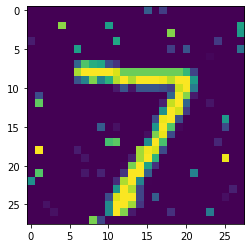

In [17]:
plt.imshow(x_test_adv_pixel[0][0])

In [4]:
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision.datasets import MNIST
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import time
from torch import nn, optim
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from torch.utils.data import DataLoader

class MnistResNet(ResNet):
    def __init__(self):
        super(MnistResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10)
        self.conv1 = torch.nn.Conv2d(1, 64, 
            kernel_size=(7, 7), 
            stride=(2, 2), 
            padding=(3, 3), bias=False)
        
def get_data_loaders(train_batch_size, val_batch_size):
    mnist = MNIST(download=False, train=True, root=".").train_data.float()
    
    data_transform= Compose([ ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])
    train_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=train_batch_size, shuffle=True)

    val_loader = DataLoader(MNIST(download=False, root=".", transform=data_transform, train=False),
                            batch_size=val_batch_size, shuffle=False)
    return train_loader, val_loader

train_loader, val_loader =  get_data_loaders(100,100)

# #MNIST accuracy of resnet
# correct = 0
# total = 0

# model = model.to("cpu")
# for images, labels in val_loader:
    
#     images = images
#     labels = labels
#     outputs = model(images)
# #     print(labels.shape)
# #     print(y_test.shape)
#     _, pre = torch.max(outputs.data, 1)
    
#     total += 100
#     correct += (pre == labels).sum()
# print("%d, %d",correct,total)    
# print('Accuracy of test text: %f %%' % (100 * float(correct) / total))

PATH='/home/aashish/Downloads/First/SpykeTorch-master/AdversarialSNN/ResNetModel.pth'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MnistResNet().to(device)
model.load_state_dict(torch.load(PATH))
model.eval()

from torch.utils.data import Dataset,TensorDataset, DataLoader
# tensor_adversarial_x=torch.from_numpy(x_test_adv)
# tensor_adversarial_x= torch.Tensor(tensor_adversarial_x)
# tensor_true_label = torch.from_numpy(y_test)
# tensor_true_label= torch.Tensor(tensor_true_label)

class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, data,target, transform):
        # assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.data=data
        self.target= target
        self.transform = transform

    def __getitem__(self, index):
        x= self.data[index]
        y=self.target[index]

        if self.transform:
            x=self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)



/home/aashish/anaconda3/envs/latestSNN/lib/python3.8/site-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [5]:
mnist = MNIST(download=False, train=True, root=".").train_data.float()
data_transform= Compose([Normalize((mnist.mean()/255,), (mnist.std()/255,))])

#MNIST accuracy of resnet for MNIST data trained for LeNet
if (torch.is_tensor(x_test) is not True):
    x_test = torch.from_numpy(x_test)
    
fgsm_dataset= CustomTensorDataset(data=x_test,target= y_test,transform=data_transform)
fgsm_adversarial_loader=DataLoader(fgsm_dataset,batch_size=100, shuffle= False)

correct = 0
total = 0

model = model.to("cpu")

for images, labels in fgsm_adversarial_loader:
        
    images = images.to("cpu")
    labels = labels.to("cpu")
    outputs = model(images)
    
    _, pre = torch.max(outputs.data, 1)
    
    total += 100
    correct += (pre == labels).sum()
    
    
print(correct)
print('Accuracy of Resnet on clean MNIST: %f %%' % (100 * float(correct) / total))

tensor(9920)
Accuracy of Resnet on clean MNIST: 99.200000 %


In [18]:
#Pixel MNIST accuracy of resnet
filename= "PIXEL_ATTACK/pixel_50.npy"
with open(filename, 'rb') as f:
    x_test_adv_pixel = np.load(f)

if (torch.is_tensor(x_test_adv_pixel) is not True):
    x_test_adv_pixel = torch.from_numpy(x_test_adv_pixel)
    
    
pixel_adversarial_dataset= CustomTensorDataset(data=x_test_adv_pixel,target= y_test,transform=data_transform)
pixel_adversarial_loader=DataLoader(pixel_adversarial_dataset,batch_size=100, shuffle= False)

correct = 0
total = 0
model = model.to("cpu")
for images, labels in pixel_adversarial_loader:
    
    images = images.to("cpu")
    
    labels = labels.to("cpu")
    outputs = model(images)
    
    _, pre = torch.max(outputs.data, 1)
    
    total += 100
    correct += (pre == labels).sum()
    
    
    
print('Accuracy of Resnet on PixelAttack MNIST is: %f %%' % (100 * float(correct) / total))

Accuracy of Resnet on PixelAttack MNIST is: 97.010000 %


In [11]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.nn.parameter import Parameter
import torchvision
import numpy as np
from SpykeTorch import snn
from SpykeTorch import visualization as vis
from SpykeTorch import functional as sf
from SpykeTorch import utils
from torchvision import transforms
import struct
import glob

use_cuda= True

class DeepMNIST(nn.Module):
	def __init__(self):
		super(DeepMNIST, self).__init__()

		self.conv1 = snn.Convolution(6, 50, 5, 0.8, 0.05)
		self.conv1_t = 20 #conv1 threshold
		self.k1 = 8 # number of winners 
		self.r1 = 4 #inhibition radius

		self.conv2 = snn.Convolution(50, 300, 3, 0.8, 0.05)
		self.conv2_t = 15 #conv2 thresholf
		self.k2 = 5
		self.r2 = 1

		self.conv3 = snn.Convolution(300, 200, 5, 0.8, 0.05)

		self.stdp1 = snn.STDP(self.conv1, (0.004, -0.003))
		self.stdp2 = snn.STDP(self.conv2, (0.004, -0.003))
		self.stdp3 = snn.STDP(self.conv3, (0.004, -0.003), False, 0.2, 0.8) #false turns off the stabilizer and 0.2,0.8 keeps the weight between 0.2 and 0.8, learning_rate tensor contains 0.004 and -0.003
		self.anti_stdp3 = snn.STDP(self.conv3, (-0.004, 0.0005), False, 0.2, 0.8) #for anti-stdp just negate the signs of learning rate
		self.max_ap = Parameter(torch.Tensor([0.15]))

		self.decision_map = []
		for i in range(10):
			self.decision_map.extend([i]*20)

		self.ctx = {"input_spikes":None, "potentials":None, "output_spikes":None, "winners":None}
		self.spk_cnt1 = 0
		self.spk_cnt2 = 0

	def forward(self, input, max_layer):
		input = sf.pad(input.float(), (2,2,2,2), 0)
		if self.training:
			pot = self.conv1(input)
			spk, pot = sf.fire(pot, self.conv1_t, True)
			if max_layer == 1:
				self.spk_cnt1 += 1
				if self.spk_cnt1 >= 500:
					self.spk_cnt1 = 0
					ap = torch.tensor(self.stdp1.learning_rate[0][0].item(), device=self.stdp1.learning_rate[0][0].device) * 2
					ap = torch.min(ap, self.max_ap)
					an = ap * -0.75
					self.stdp1.update_all_learning_rate(ap.item(), an.item())
				pot = sf.pointwise_inhibition(pot)
				spk = pot.sign()
				winners = sf.get_k_winners(pot, self.k1, self.r1, spk)
				self.ctx["input_spikes"] = input
				self.ctx["potentials"] = pot
				self.ctx["output_spikes"] = spk
				self.ctx["winners"] = winners
				return spk, pot
			spk_in = sf.pad(sf.pooling(spk, 2, 2), (1,1,1,1))
			pot = self.conv2(spk_in)
			spk, pot = sf.fire(pot, self.conv2_t, True)
			if max_layer == 2:
				self.spk_cnt2 += 1
				if self.spk_cnt2 >= 500:
					self.spk_cnt2 = 0
					ap = torch.tensor(self.stdp2.learning_rate[0][0].item(), device=self.stdp2.learning_rate[0][0].device) * 2
					ap = torch.min(ap, self.max_ap)
					an = ap * -0.75
					self.stdp2.update_all_learning_rate(ap.item(), an.item())
				pot = sf.pointwise_inhibition(pot)
				spk = pot.sign()
				winners = sf.get_k_winners(pot, self.k2, self.r2, spk) 
				self.ctx["input_spikes"] = spk_in
				self.ctx["potentials"] = pot
				self.ctx["output_spikes"] = spk
				self.ctx["winners"] = winners
				return spk, pot
			spk_in = sf.pad(sf.pooling(spk, 3, 3), (2,2,2,2))
			pot = self.conv3(spk_in)
			spk = sf.fire(pot)
			winners = sf.get_k_winners(pot, 1, 0, spk) #see get_k_winner manual, returns a list of tuple [(feature1,row1,column1),(feature2,row2,column2),..]
			self.ctx["input_spikes"] = spk_in
			self.ctx["potentials"] = pot
			self.ctx["output_spikes"] = spk
			self.ctx["winners"] = winners
			output = -1
			if len(winners) != 0:
				output = self.decision_map[winners[0][0]]
			return output
		else: #After training, just pass the inputs through the network and get output
			pot = self.conv1(input)
			spk, pot = sf.fire(pot, self.conv1_t, True)
			if max_layer == 1:
				return spk, pot
			pot = self.conv2(sf.pad(sf.pooling(spk, 2, 2), (1,1,1,1)))
			spk, pot = sf.fire(pot, self.conv2_t, True)
			if max_layer == 2:
				return spk, pot
			pot = self.conv3(sf.pad(sf.pooling(spk, 3, 3), (2,2,2,2)))
			spk = sf.fire(pot)
			winners = sf.get_k_winners(pot, 1, 0, spk)
			output = -1
			if len(winners) != 0:
				output = self.decision_map[winners[0][0]]  #returning the label of the winner output
			return output
	
	def stdp(self, layer_idx):
		if layer_idx == 1:
			self.stdp1(self.ctx["input_spikes"], self.ctx["potentials"], self.ctx["output_spikes"], self.ctx["winners"])
		if layer_idx == 2:
			self.stdp2(self.ctx["input_spikes"], self.ctx["potentials"], self.ctx["output_spikes"], self.ctx["winners"])

	def update_learning_rates(self, stdp_ap, stdp_an, anti_stdp_ap, anti_stdp_an):
		self.stdp3.update_all_learning_rate(stdp_ap, stdp_an)
		self.anti_stdp3.update_all_learning_rate(anti_stdp_an, anti_stdp_ap)

	def reward(self):
		self.stdp3(self.ctx["input_spikes"], self.ctx["potentials"], self.ctx["output_spikes"], self.ctx["winners"])

	def punish(self):
		self.anti_stdp3(self.ctx["input_spikes"], self.ctx["potentials"], self.ctx["output_spikes"], self.ctx["winners"])

def train_unsupervise(network, data, layer_idx):
	network.train()
	for i in range(len(data)):
		data_in = data[i]
		if use_cuda:
			data_in = data_in.cuda()
		network(data_in, layer_idx)
		network.stdp(layer_idx)

def train_rl(network, data, target):
	network.train()
	perf = np.array([0,0,0]) # correct, wrong, silence
	for i in range(len(data)):
		data_in = data[i]
		target_in = target[i]
		if use_cuda:
			data_in = data_in.cuda()
			target_in = target_in.cuda()
		d = network(data_in, 3)
		if d != -1:
			if d == target_in:
				perf[0]+=1
				network.reward()
			else:
				perf[1]+=1
				network.punish()
		else:
			perf[2]+=1
	return perf/len(data)

def test(network, data, target):
	network.eval()
	perf = np.array([0,0,0]) # correct, wrong, silence
	for i in range(len(data)):
		data_in = data[i]
		target_in = target[i]
		if use_cuda:
			data_in = data_in.cuda()
			target_in = target_in.cuda()
		d = network(data_in, 3)
		if d != -1:
			if d == target_in:
				perf[0]+=1
			else:
				perf[1]+=1
		else:
			perf[2]+=1
	return perf/len(data)

class S1C1Transform:
    def __init__(self,filter,timesteps=15):
        self.to_tensor= transforms.ToTensor()
        self.filter= filter
        self.temporal_transform= utils.Intensity2Latency(timesteps)
        self.cnt= 0
    def __call__(self, image):
        if self.cnt % 1000 ==0:
            print(self.cnt)
        self.cnt += 1
        image= self.to_tensor(image) * 255
        image.unsqueeze_(0)
        image= self.filter(image)
        
        image= sf.local_normalization(image, 8)
        temporal_image= self.temporal_transform(image)
        return temporal_image.sign().byte()

kernels = [ utils.DoGKernel(3,3/9,6/9),
			utils.DoGKernel(3,6/9,3/9),
			utils.DoGKernel(7,7/9,14/9),
			utils.DoGKernel(7,14/9,7/9),
			utils.DoGKernel(13,13/9,26/9),
			utils.DoGKernel(13,26/9,13/9)]
filter= utils.Filter(kernels,padding=6,thresholds=50)
s1c1=S1C1Transform(filter)

data_root = "data"
MNIST_train= utils.CacheDataset(torchvision.datasets.MNIST(root=data_root,train=True,download=True, transform=s1c1))
MNIST_test = utils.CacheDataset(torchvision.datasets.MNIST(root=data_root, train=False, download=True, transform = s1c1))
MNIST_loader = DataLoader(MNIST_train, batch_size=1000, shuffle=False)
MNIST_testLoader = DataLoader(MNIST_test, batch_size=len(MNIST_test), shuffle=False)


for data_t,targets_t in MNIST_testLoader:
    print(data_t.shape)
    print(targets_t.shape)
print(MNIST_loader)



0
1000
2000
3000
4000
5000
6000
7000
8000
9000
torch.Size([10000, 15, 6, 28, 28])
torch.Size([10000])


In [12]:
snn1= DeepMNIST()
if use_cuda:
    snn1.cuda()
    
#Training the first layer

print("Training the first layer")
if os.path.isfile("saved_fl_ts15.net"):
    snn1.load_state_dict(torch.load("saved_fl_ts15.net"))
else:
    for epoch in range(2):
        print("Epoch",epoch)
        iter=0
        for data, targets in MNIST_loader:
            print("Iteration",iter)
            train_unsupervise(snn1,data,1) #first layer so layer index=1
            print("Done")
            iter +=1
        torch.save(snn1.state_dict(),"saved_fl_ts15.net")
#Training the second layer
if os.path.isfile("saved_sl_ts15.net"):
    snn1.load_state_dict(torch.load("saved_sl_ts15.net"))
else:
    for epoch in range(4):
        print("Epoch",epoch)
        iter=0
        for data, targets in MNIST_loader:
            print("Iteration",iter)
            train_unsupervise(snn1,data,2) #second layer so layer index=2
            print("Done!")
            iter+= 1
    torch.save(snn1.state_dict(),"saved_sl_ts15.net")

# initial adaptive learning rates
apr = snn1.stdp3.learning_rate[0][0].item()
anr = snn1.stdp3.learning_rate[0][1].item()
app = snn1.anti_stdp3.learning_rate[0][1].item()
anp = snn1.anti_stdp3.learning_rate[0][0].item()

adaptive_min = 0
adaptive_int = 1
apr_adapt = ((1.0 - 1.0 / 10) * adaptive_int + adaptive_min) * apr
anr_adapt = ((1.0 - 1.0 / 10) * adaptive_int + adaptive_min) * anr
app_adapt = ((1.0 / 10) * adaptive_int + adaptive_min) * app
anp_adapt = ((1.0 / 10) * adaptive_int + adaptive_min) * anp

# perf
best_train = np.array([0.0,0.0,0.0,0.0]) # correct, wrong, silence, epoch
best_test = np.array([0.0,0.0,0.0,0.0]) # correct, wrong, silence, epoch

# Training The Third Layer
print("Training the third layer")
for epoch in range(15):
	print("Epoch #:", epoch)
	perf_train = np.array([0.0,0.0,0.0])
	for data,targets in MNIST_loader:
		perf_train_batch = train_rl(snn1, data, targets)
		print(perf_train_batch)
		#update adaptive learning rates
		apr_adapt = apr * (perf_train_batch[1] * adaptive_int + adaptive_min)
		anr_adapt = anr * (perf_train_batch[1] * adaptive_int + adaptive_min)
		app_adapt = app * (perf_train_batch[0] * adaptive_int + adaptive_min)
		anp_adapt = anp * (perf_train_batch[0] * adaptive_int + adaptive_min)
		snn1.update_learning_rates(apr_adapt, anr_adapt, app_adapt, anp_adapt)
		perf_train += perf_train_batch
	perf_train /= len(MNIST_loader)
	if best_train[0] <= perf_train[0]:
		best_train = np.append(perf_train, epoch)
	print("Current Train:", perf_train)
	print("   Best Train:", best_train)

	for data,targets in MNIST_testLoader:
		perf_test = test(snn1, data, targets)
		if best_test[0] <= perf_test[0]:
			best_test = np.append(perf_test, epoch)
			torch.save(snn1.state_dict(), "saved_final_ts15.net")
		print(" Current Test:", perf_test)
		print("    Best Test:", best_test)


Training the first layer
Epoch 0
10000
Iteration 0
Done
11000
Iteration 1
Done
12000
Iteration 2
Done
13000
Iteration 3
Done
14000
Iteration 4
Done
15000
Iteration 5
Done
16000
Iteration 6
Done
17000
Iteration 7
Done
18000
Iteration 8
Done
19000
Iteration 9
Done
20000
Iteration 10
Done
21000
Iteration 11
Done
22000
Iteration 12
Done
23000
Iteration 13
Done
24000
Iteration 14
Done
25000
Iteration 15
Done
26000
Iteration 16
Done
27000
Iteration 17
Done
28000
Iteration 18
Done
29000
Iteration 19
Done
30000
Iteration 20
Done
31000
Iteration 21
Done
32000
Iteration 22
Done
33000
Iteration 23
Done
34000
Iteration 24
Done
35000
Iteration 25
Done
36000
Iteration 26
Done
37000
Iteration 27
Done
38000
Iteration 28
Done
39000
Iteration 29
Done
40000
Iteration 30
Done
41000
Iteration 31
Done
42000
Iteration 32
Done
43000
Iteration 33
Done
44000
Iteration 34
Done
45000
Iteration 35
Done
46000
Iteration 36
Done
47000
Iteration 37
Done
48000
Iteration 38
Done
49000
Iteration 39
Done
50000
Iteration 4

[0.88 0.12 0.  ]
[0.901 0.099 0.   ]
[0.891 0.109 0.   ]
[0.862 0.138 0.   ]
[0.91 0.09 0.  ]
[0.887 0.113 0.   ]
Current Train: [0.81253333 0.18746667 0.        ]
   Best Train: [0.81253333 0.18746667 0.         0.        ]
 Current Test: [0.8687 0.1313 0.    ]
    Best Test: [0.8687 0.1313 0.     0.    ]
Epoch #: 1
[0.866 0.134 0.   ]
[0.869 0.131 0.   ]
[0.888 0.112 0.   ]
[0.879 0.121 0.   ]
[0.892 0.108 0.   ]
[0.883 0.117 0.   ]
[0.873 0.127 0.   ]
[0.852 0.148 0.   ]
[0.853 0.147 0.   ]
[0.891 0.109 0.   ]
[0.889 0.111 0.   ]
[0.884 0.116 0.   ]
[0.851 0.149 0.   ]
[0.862 0.138 0.   ]
[0.845 0.155 0.   ]
[0.863 0.137 0.   ]
[0.87 0.13 0.  ]
[0.87 0.13 0.  ]
[0.914 0.086 0.   ]
[0.88 0.12 0.  ]
[0.898 0.102 0.   ]
[0.905 0.095 0.   ]
[0.871 0.129 0.   ]
[0.905 0.095 0.   ]
[0.903 0.097 0.   ]
[0.894 0.106 0.   ]
[0.901 0.099 0.   ]
[0.896 0.104 0.   ]
[0.919 0.081 0.   ]
[0.867 0.133 0.   ]
[0.852 0.148 0.   ]
[0.852 0.148 0.   ]
[0.888 0.112 0.   ]
[0.9 0.1 0. ]
[0.892 0.108 0. 

[0.916 0.084 0.   ]
[0.909 0.091 0.   ]
[0.948 0.052 0.   ]
[0.925 0.075 0.   ]
[0.939 0.061 0.   ]
[0.94 0.06 0.  ]
[0.956 0.044 0.   ]
[0.942 0.058 0.   ]
[0.933 0.067 0.   ]
[0.962 0.038 0.   ]
[0.946 0.054 0.   ]
Current Train: [0.93298333 0.06701667 0.        ]
   Best Train: [0.93298333 0.06701667 0.         6.        ]
 Current Test: [0.934 0.066 0.   ]
    Best Test: [0.934 0.066 0.    6.   ]
Epoch #: 7
[0.939 0.061 0.   ]
[0.937 0.063 0.   ]
[0.95 0.05 0.  ]
[0.951 0.049 0.   ]
[0.944 0.056 0.   ]
[0.935 0.065 0.   ]
[0.935 0.065 0.   ]
[0.926 0.074 0.   ]
[0.909 0.091 0.   ]
[0.947 0.053 0.   ]
[0.928 0.072 0.   ]
[0.941 0.059 0.   ]
[0.93 0.07 0.  ]
[0.928 0.072 0.   ]
[0.926 0.074 0.   ]
[0.925 0.075 0.   ]
[0.932 0.068 0.   ]
[0.925 0.075 0.   ]
[0.951 0.049 0.   ]
[0.943 0.057 0.   ]
[0.925 0.075 0.   ]
[0.95 0.05 0.  ]
[0.916 0.084 0.   ]
[0.95 0.05 0.  ]
[0.931 0.069 0.   ]
[0.931 0.069 0.   ]
[0.929 0.071 0.   ]
[0.934 0.066 0.   ]
[0.952 0.048 0.   ]
[0.924 0.076 0.  

[0.941 0.059 0.   ]
[0.939 0.061 0.   ]
[0.944 0.056 0.   ]
[0.936 0.064 0.   ]
[0.939 0.061 0.   ]
[0.96 0.04 0.  ]
[0.944 0.056 0.   ]
[0.951 0.049 0.   ]
[0.961 0.039 0.   ]
[0.963 0.037 0.   ]
[0.952 0.048 0.   ]
[0.95 0.05 0.  ]
[0.974 0.026 0.   ]
[0.957 0.043 0.   ]
Current Train: [0.95091667 0.04908333 0.        ]
   Best Train: [ 0.95091667  0.04908333  0.         12.        ]
 Current Test: [0.9478 0.0522 0.    ]
    Best Test: [ 0.9478  0.0522  0.     12.    ]
Epoch #: 13
[0.956 0.044 0.   ]
[0.963 0.037 0.   ]
[0.963 0.037 0.   ]
[0.957 0.043 0.   ]
[0.955 0.045 0.   ]
[0.951 0.049 0.   ]
[0.944 0.056 0.   ]
[0.957 0.043 0.   ]
[0.937 0.063 0.   ]
[0.96 0.04 0.  ]
[0.945 0.055 0.   ]
[0.955 0.045 0.   ]
[0.958 0.042 0.   ]
[0.949 0.051 0.   ]
[0.949 0.051 0.   ]
[0.949 0.051 0.   ]
[0.95 0.05 0.  ]
[0.944 0.056 0.   ]
[0.965 0.035 0.   ]
[0.955 0.045 0.   ]
[0.945 0.055 0.   ]
[0.961 0.039 0.   ]
[0.939 0.061 0.   ]
[0.964 0.036 0.   ]
[0.952 0.048 0.   ]
[0.948 0.052 0.   

In [7]:
snn1= DeepMNIST()
if use_cuda:
    snn1.cuda()
snn1.load_state_dict(torch.load("saved.net"))

<All keys matched successfully>

In [13]:
class S1C1Transform_second:
    def __init__(self,filter,timesteps=15):
        self.to_tensor= transforms.ToTensor()
        self.filter= filter
        self.temporal_transform= utils.Intensity2Latency(timesteps)
        self.cnt= 0
    def __call__(self, image):
        if self.cnt % 1000 ==0:
            print(self.cnt)
        self.cnt += 1
        image= self.to_tensor(image) * 255
        # print(image.shape)
        image.unsqueeze_(0)
        # print(image.shape)
        image= image.permute(0,2,3,1)
#         image= image.transpose(1,2)
        image= self.filter(image)
        image= sf.local_normalization(image, 8)
        temporal_image= self.temporal_transform(image)
        return temporal_image.sign().byte()

kernels = [ utils.DoGKernel(3,3/9,6/9),
			utils.DoGKernel(3,6/9,3/9),
			utils.DoGKernel(7,7/9,14/9),
			utils.DoGKernel(7,14/9,7/9),
			utils.DoGKernel(13,13/9,26/9),
			utils.DoGKernel(13,26/9,13/9)]
filter= utils.Filter(kernels,padding=6,thresholds=50)
s1c1_second=S1C1Transform_second(filter)

from torch.utils.data import Dataset,TensorDataset, DataLoader

# tensor_true_label = torch.from_numpy(y_test)
# tensor_true_label= torch.Tensor(tensor_true_label)


class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, data,target, transform=None):
        # assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.data=data
        self.target= target
        self.transform = transform

    def __getitem__(self, index):
        x= self.data[index]
        y=self.target[index]

        if self.transform:
            x=self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)


In [14]:
#Test for JSMA adv images
path= 'JSMA_attack/'
filename= path+"jsma_1.npy"
with open(filename, 'rb') as f:
    x_test_adv_pgd = np.load(f)
my_dataset= CustomTensorDataset(data=x_test_adv_pgd,target= y_test,transform=s1c1_second)
adversarial_loader=DataLoader(my_dataset,batch_size=len(my_dataset), shuffle= False)

advs_datas=utils.CacheDataset(my_dataset)
adversarial_loader=DataLoader(advs_datas,batch_size=len(advs_datas), shuffle= False)
best_test_t = np.array([0.0,0.0,0.0,0.0]) # correct, wrong, silence, epoch

# for epoch in range(2):
#     print("Epuch #",epoch)

for data_t, target_t in adversarial_loader:
    perf_test_t= test(snn1,data_t,targets_t)
    if best_test_t[0] <= perf_test_t[0]:
        best_test_t= np.append(perf_test_t,epoch)
        torch.save(snn1.state_dict(),"saved_final_ts15.net")
    print("Current Test",perf_test_t)
    print("Best Test:",best_test_t)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Current Test [0.7286 0.2421 0.0293]
Best Test: [ 0.7286  0.2421  0.0293 14.    ]


In [19]:
#Test for pixel adv images
path= 'PIXEL_ATTACK/'
filename= path+"pixel_50.npy"
with open(filename, 'rb') as f:
    x_test_adv_pgd = np.load(f)
my_dataset= CustomTensorDataset(data=x_test_adv_pgd,target= y_test,transform=s1c1_second)
adversarial_loader=DataLoader(my_dataset,batch_size=len(my_dataset), shuffle= False)

advs_datas=utils.CacheDataset(my_dataset)
adversarial_loader=DataLoader(advs_datas,batch_size=len(advs_datas), shuffle= False)
best_test_t = np.array([0.0,0.0,0.0,0.0]) # correct, wrong, silence, epoch

# for epoch in range(2):
#     print("Epuch #",epoch)
for epoch in range(1):
    for data_t, target_t in adversarial_loader:
        perf_test_t= test(snn1,data_t,targets_t)
        if best_test_t[0] <= perf_test_t[0]:
            best_test_t= np.append(perf_test_t,epoch)
            torch.save(snn1.state_dict(),"saved_final_ts15.net")
        print("Current Test",perf_test_t)
        print("Best Test:",best_test_t)

20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
Current Test [0.9243 0.0757 0.    ]
Best Test: [0.9243 0.0757 0.     0.    ]


(100, 1, 28, 28)